In [1]:
%matplotlib inline
import numpy as np
import lsst.sims.featureScheduler as fs
from speed_observatory import Speed_observatory
import healpy as hp
import matplotlib.pylab as plt

/Users/yoachim/lsst/DarwinX86/miniconda2/3.19.0.lsst4/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# run for a few days
survey_length = 5.  # days
# Define what we want the final visit ratio map to look like
target_map = fs.standard_goals()['r']

bfs = []
bfs.append(fs.Depth_percentile_basis_function())
bfs.append(fs.Target_map_basis_function(target_map=target_map))
weights = np.array([5., .1])
survey = fs.Simple_greedy_survey(bfs, weights)
scheduler = fs.Core_scheduler([survey])

observations = []
observatory = Speed_observatory()
mjd = observatory.mjd
end_mjd = mjd + survey_length
# Initiallize scheduler with conditions
scheduler.update_conditions(observatory.return_status())
while mjd < end_mjd:
    desired_obs = scheduler.request_observation()
    attempted_obs = observatory.attempt_observe(desired_obs)
    if attempted_obs is not None:
        scheduler.add_observation(attempted_obs)
        observations.append(attempted_obs)
    scheduler.update_conditions(observatory.return_status())
    mjd = observatory.mjd

# Collapse observations into single array
print len(observations)
observations = np.array(observations)[:, 0]

1614


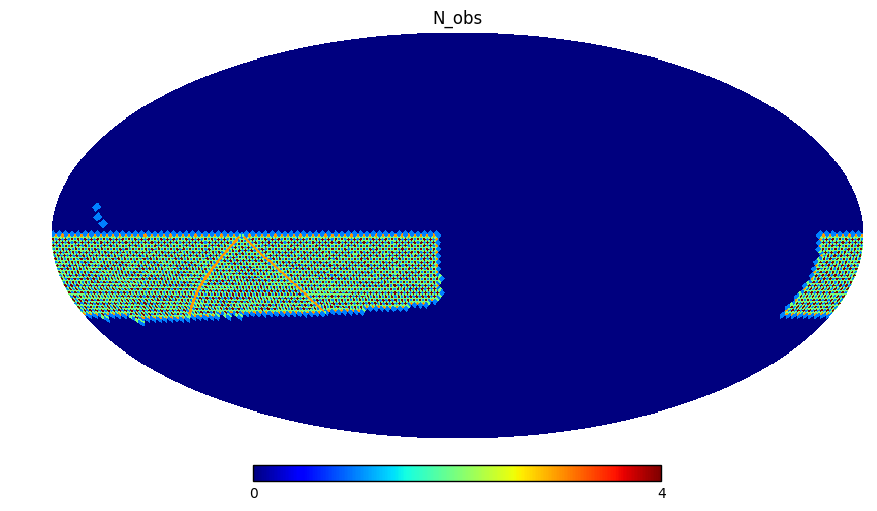

In [3]:
hp.mollview(scheduler.surveys[0].basis_functions[1].survey_features['N_obs'].feature,
            title='N_obs')
# hp.mollview(scheduler.surveys[0].)

In [4]:
print scheduler.surveys[0].basis_functions[1].survey_features['N_obs_reference'].feature

0


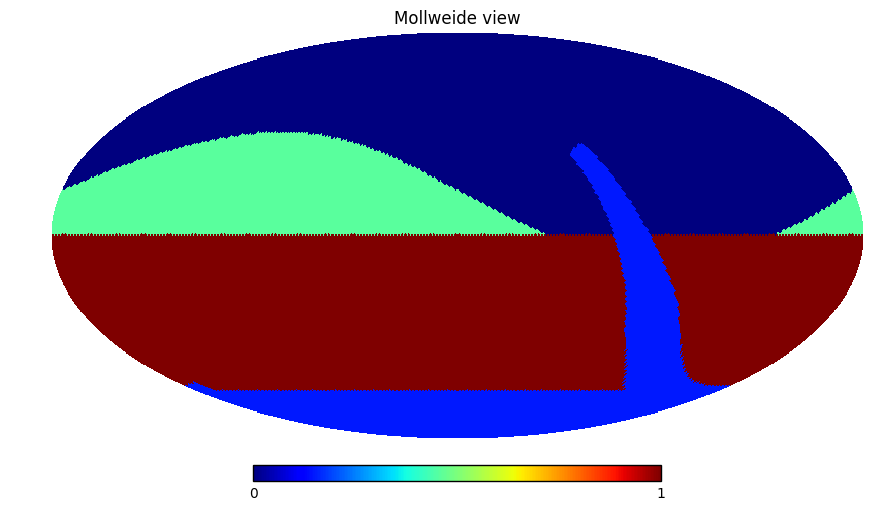

In [5]:
hp.mollview(scheduler.surveys[0].basis_functions[1].target_map)

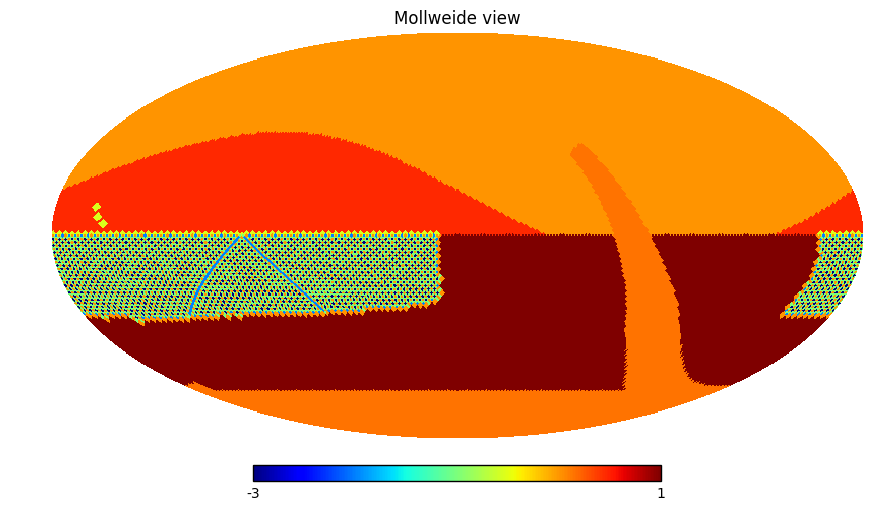

In [6]:
hp.mollview(scheduler.surveys[0].basis_functions[1]())

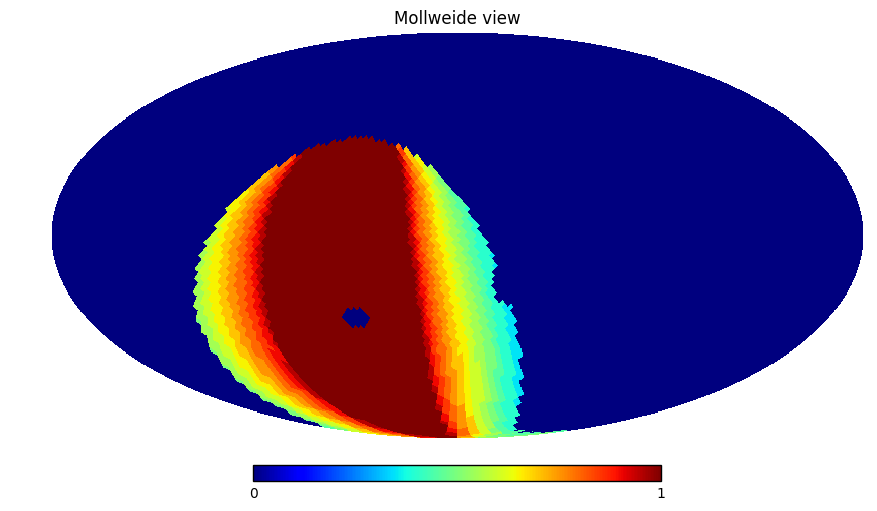

In [7]:
hp.mollview(scheduler.surveys[0].basis_functions[0]())

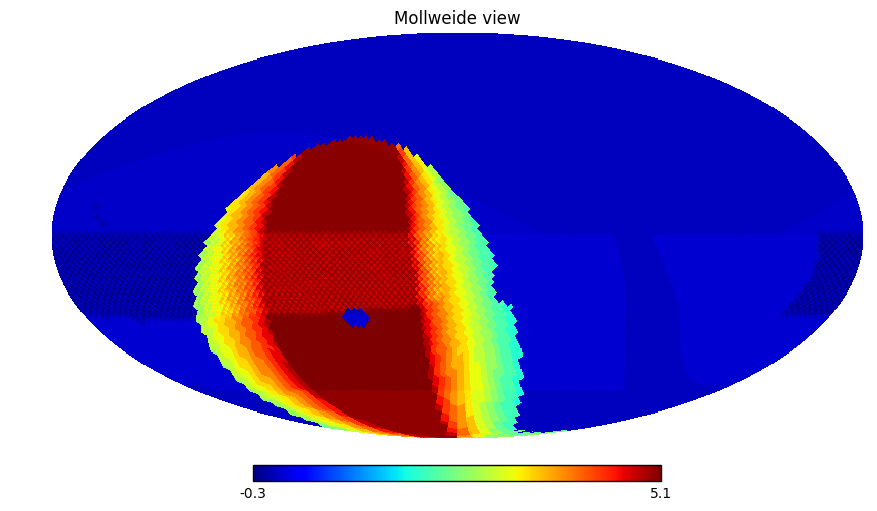

In [8]:
hp.mollview(scheduler.surveys[0].calc_reward_function())

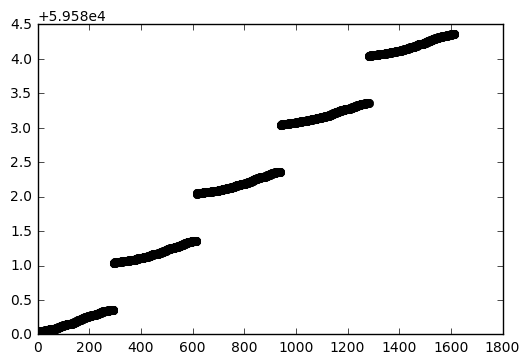

In [9]:
plt.plot(observations['mjd'], 'ko')